COMP 3610
Project

### A PREDICTIVE MODEL FOR ELECTORAL OUTCOMES IN TRINIDAD & TOBAGO

Christophe Gittens Maia Neptune Zidane Timothy     

In [1]:
# initialize Program
# %pip install requests beautifulsoup4 python-csv
# %pip install pandas

import pandas as pd
import numpy as np
import csv
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
election_results = pd.read_excel('csvs/collated-tt-election-results.xlsx', sheet_name=['2007', '2010', '2015','2020'], skiprows=[0,1,2,3,4])

# headers = 
# Access individual sheets using sheet names
sheet_2007 = election_results['2007']
sheet_2010 = election_results['2010']
sheet_2015 = election_results['2015']
sheet_2020 = election_results['2020']

In [3]:
sheet_2007.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
VOTES CAST     0
Unnamed: 3     0
Unnamed: 4     0
POLLED         0
VOTES          0
%              0
VOTES.1        0
%.1            0
VOTES.2        0
%.2            0
VOTES.3       39
%.3           39
VOTES.4       39
%.4           39
VOTES.5       37
%.5           37
dtype: int64

In [4]:
# sht_07, sht_10, sht_15, sht_20 = sheet_2007.iloc[3:], sheet_2010.iloc[3:], sheet_2015.iloc[3:], sheet_2020.iloc[3:]

# print(sht_07)
# print(sht_10)
# print(sht_15)
# print(sht_20)
# sht_20

In [5]:
sheet_2007.shape

(42, 18)

Fixing headers

2007

In [6]:
cols= [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%', 'C.O.P._VOTES', 
            'C.O.P._VOTES_%', 'D.A.C._VOTES', 'D.A.C._VOTES_%', 'D.N.A._VOTES', 
            'D.N.A._VOTES_%', 'I.N.D._VOTES', 'I.N.D._VOTES_%'
        ]
sht_07 = sheet_2007
sht_07.columns = cols
sht_07.fillna(0, inplace=True)
sht_07

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,C.O.P._VOTES,C.O.P._VOTES_%,D.A.C._VOTES,D.A.C._VOTES_%,D.N.A._VOTES,D.N.A._VOTES_%,I.N.D._VOTES,I.N.D._VOTES_%
0,ARIMA,22845,13464,0.589363,91,13373,8603,0.643311,1224,0.091528,3464,0.259029,0.0,0.000000,0.0,0.000000,82.0,0.006132
1,AROUCA/MALONEY,23673,15948,0.673679,40,15908,12055,0.757795,1480,0.093035,2373,0.149170,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,BARATARIA/SAN JUAN,24597,16451,0.668821,93,16358,7179,0.438868,5362,0.327791,3817,0.233341,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,CARONI CENTRAL,22813,16640,0.729409,46,16594,4579,0.275943,7615,0.458901,4400,0.265156,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,23554,16460,0.698820,64,16396,3833,0.233777,8333,0.508234,4230,0.257990,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,22383,15887,0.709780,51,15836,6757,0.426686,4993,0.315294,4086,0.258020,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,24272,18029,0.742790,82,17947,1519,0.084638,11150,0.621274,5278,0.294088,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,25898,18992,0.733338,72,18920,5249,0.277431,8832,0.466808,4839,0.255761,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,25188,17987,0.714110,53,17934,5097,0.284209,8428,0.469945,4409,0.245846,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,24700,17751,0.718664,76,17675,7124,0.403055,7368,0.416860,3183,0.180085,0.0,0.000000,0.0,0.000000,0.0,0.000000


2010

In [7]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%', 'C.O.P._VOTES', 
            'C.O.P._VOTES_%', 'N.N.V._VOTES', 'N.N.V._VOTES_%', 'T.O.P._VOTES', 
            'T.O.P._VOTES_%', 'T.H.C._VOTES', 'T.H.C._VOTES_%', 'I.N.D._VOTES', 
            'I.N.D._VOTES_%', 'T.T.N.C.P._VOTES', 'T.T.N.C.P._VOTES_%'
        ]

sht_10 = sheet_2010
sht_10.columns = cols
sht_10.fillna(0, inplace=True)
sht_10

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,N.N.V._VOTES,N.N.V._VOTES_%,T.O.P._VOTES,T.O.P._VOTES_%,T.H.C._VOTES,T.H.C._VOTES_%,I.N.D._VOTES,I.N.D._VOTES_%,T.T.N.C.P._VOTES,T.T.N.C.P._VOTES_%
0,ARIMA,24115,15130,0.627410,73,15057,7246,0.481238,7610,0.505413,...,201.0,0.013349,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AROUCA/MALONEY,25019,17196,0.687318,46,17150,11517,0.671545,5520,0.321866,...,0.0,0.000000,0.0,0.0,0.0,0.000000,113.0,0.006589,0.0,0.000000
2,BARATARIA/SAN JUAN,25394,17768,0.699693,76,17692,6742,0.381076,10950,0.618924,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,CARONI CENTRAL,24601,18793,0.763912,50,18743,4880,0.260364,13863,0.739636,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,25166,18762,0.745530,57,18705,3724,0.199091,14981,0.800909,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,23653,17611,0.744557,58,17553,6717,0.382670,10797,0.615109,...,39.0,0.002222,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,25715,20281,0.788684,70,20211,1471,0.072782,18740,0.927218,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,27680,21286,0.769003,70,21216,5159,0.243166,16057,0.756834,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,26400,19877,0.752917,59,19818,4773,0.240842,15045,0.759158,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,26896,20527,0.763199,121,20406,7181,0.351906,13116,0.642752,...,0.0,0.000000,0.0,0.0,0.0,0.000000,109.0,0.005342,0.0,0.000000


2015

In [8]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%', 'C.O.P._VOTES', 
            'C.O.P._VOTES_%', 'I.L.P._VOTES', 'I.L.P._VOTES_%', 'N.J.A.C._VOTES',
            'N.J.A.C._VOTES_%','D.D.P._VOTES', 'D.D.P._VOTES_%', 'I.D.P._VOTES',
            'I.D.P._VOTES_%', 'I.N.D._VOTES', 'I.N.D._VOTES_%', 'L.O.V.E._VOTES',
            'L.O.V.E._VOTES_%', 'N.C.T._VOTES', 'N.C.T._VOTES_%','N.N.V._VOTES',
            'N.N.V._VOTES_%','T.F._VOTES', 'T.F._VOTES_%', 'T.O.P._VOTES', 
            'T.O.P._VOTES_%', 'T.H.C._VOTES', 'T.H.C._VOTES_%', 'T.N.V._VOTES',
            'T.N.V._VOTES_%', 'T.P.T._VOTES', 'T.P.T._VOTES_%', 'Y.E.P._VOTES', 
            'Y.E.P._VOTES_%', 'Y.O.U.R._VOTES', 'Y.O.U.R._VOTES_%',
        ]
sht_15 = sheet_2015
sht_15.columns = cols
sht_15.fillna(0, inplace=True)
sht_15

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,T.H.C._VOTES,T.H.C._VOTES_%,T.N.V._VOTES,T.N.V._VOTES_%,T.P.T._VOTES,T.P.T._VOTES_%,Y.E.P._VOTES,Y.E.P._VOTES_%,Y.O.U.R._VOTES,Y.O.U.R._VOTES_%
0,ARIMA,25555,15761,0.616748,56,15705,10879,0.695200,4578,0.292500,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AROUCA/MALONEY,26321,18250,0.693363,50,18200,14843,0.815500,3357,0.184500,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,BARATARIA/SAN JUAN,25529,16970,0.664734,32,16938,8182,0.483056,8722,0.514937,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,34.0,0.002007,0.0,0.000000
3,CARONI CENTRAL,27887,19731,0.707534,37,19694,7206,0.365898,12349,0.627044,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,27602,18863,0.683393,41,18822,5095,0.270694,13525,0.718574,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,25488,17942,0.703939,27,17915,7860,0.438738,9284,0.518225,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,27704,20179,0.728379,65,20114,2190,0.108879,17506,0.870339,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,29284,20816,0.710832,46,20770,6749,0.324940,13845,0.666586,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,28499,20186,0.708306,50,20136,6070,0.301450,13889,0.689760,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,28152,20004,0.710571,75,19929,8282,0.415575,11461,0.575092,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


2020

In [9]:
cols = [
            'ELECTORAL_DISTRICT', 'ELECTORATE', 'TOTAL_NUMBER_OF_VOTES_CAST',
            'VOTER_TURNOUT', 'REJECTED_BALLOTS', 'VALID_VOTES', 'P.N.M._VOTES',
            'P.N.M._VOTES_%', 'U.N.C._VOTES','U.N.C._VOTES_%','P.E.P._VOTES', 
            'P.E.P._VOTES_%', 'C.O.P._VOTES', 'C.O.P._VOTES_%', 'I.L.P._VOTES', 
            'I.L.P._VOTES_%', 'D.P.T._VOTES', 'D.P.T._VOTES_%', 'I.N.D._VOTES', 
            'I.N.D._VOTES_%','M.N.D._VOTES', 'M.N.D._VOTES_%', 'M.S.J._VOTES',
            'M.S.J._VOTES_%', 'N.C.T._VOTES', 'N.C.T._VOTES_%','N.N.V._VOTES',
            'N.N.V._VOTES_%','N.O.W._VOTES', 'N.O.W._VOTES_%', 'O.T.V._VOTES', 
            'O.T.V._VOTES_%', 'P.D.P._VOTES', 'P.D.P._VOTES_%', 'P.P._VOTES', 
            'P.P._VOTES_%', 'T.D.F._VOTES', 'T.D.F._VOTES_%', 'T.H.C._VOTES', 
            'T.H.C._VOTES_%', 'T.N.P._VOTES', 'T.N.P._VOTES_%', 'U.P.P._VOTES', 
            'U.P.P._VOTES_%', 'U.T.P._VOTES', 'U.T.P._VOTES_%'
        ]
sht_20 = sheet_2020
sht_20.columns = cols
sht_20.fillna(0, inplace=True)
sht_20

,ELECTORAL_DISTRICT,ELECTORATE,TOTAL_NUMBER_OF_VOTES_CAST,VOTER_TURNOUT,REJECTED_BALLOTS,VALID_VOTES,P.N.M._VOTES,P.N.M._VOTES_%,U.N.C._VOTES,U.N.C._VOTES_%,...,T.D.F._VOTES,T.D.F._VOTES_%,T.H.C._VOTES,T.H.C._VOTES_%,T.N.P._VOTES,T.N.P._VOTES_%,U.P.P._VOTES,U.P.P._VOTES_%,U.T.P._VOTES,U.T.P._VOTES_%
0,ARIMA,26382,13488,0.511258,30,13458,9293,0.695200,3858,0.286670,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AROUCA/MALONEY,26673,15522,0.581937,57,15465,12697,0.815500,2768,0.178985,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,BARATARIA/SAN JUAN,25690,15771,0.613896,27,15744,7240,0.459858,8300,0.527185,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,CARONI CENTRAL,30107,18677,0.620354,31,18646,6890,0.369516,11511,0.617344,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,CARONI EAST,29031,17416,0.599910,30,17386,4271,0.245657,12819,0.737317,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,CHAGUANAS EAST,26923,17125,0.636073,53,17072,7882,0.461692,8968,0.525305,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,CHAGUANAS WEST,28625,17566,0.613659,48,17518,1878,0.107204,15502,0.884918,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,COUVA NORTH,29864,18238,0.610702,25,18213,5222,0.286718,12633,0.693625,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,COUVA SOUTH,30348,18281,0.602379,36,18245,5542,0.303754,12597,0.690436,...,0.0,0.000000,106.0,0.005810,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,CUMUTO/MANZANILLA,30468,18702,0.613824,51,18651,7557,0.405179,10901,0.584473,...,0.0,0.000000,35.0,0.001877,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [10]:
# Combine all sheets into one DataFrame with a 'YEAR' column

sht_07['YEAR'] = 2007
sht_10['YEAR'] = 2010
sht_15['YEAR'] = 2015
sht_20['YEAR'] = 2020

results_df = pd.concat(
    [sht_07,
    sht_10,
    sht_15,
    sht_20
    ]
)


parties = ['P.N.M._VOTES_%', 'U.N.C._VOTES_%']
results_df['ELECTORAL_DISTRICT'] = sht_20['ELECTORAL_DISTRICT'].astype(str)
results_df['YEAR'] = pd.to_numeric(results_df['YEAR'], errors='coerce')
results_df.sort_values(['ELECTORAL_DISTRICT', 'YEAR'], inplace=True)


# Calculate year-over-year margins
for party in parties:
    results_df[party] = pd.to_numeric(results_df[party], errors='coerce').fillna(0)
    results_df[f'{party}_MARGIN_CHANGE'] = results_df.groupby('ELECTORAL_DISTRICT')[party].diff()*100

results_long = results_df.melt(id_vars=['ELECTORAL_DISTRICT'],
                               value_vars=[col for col in results_df.columns if 'VOTES' in col],
                               var_name='PARTY', value_name='POINT_SWING')

years_repeated = np.tile([2007, 2010, 2015, 2020], 2940)

# Add the 'YEAR' column to the DataFrame
results_long['YEAR'] = years_repeated

# Sort data by electoral district and year for margin calculation
results_long = results_long.sort_values(by=['ELECTORAL_DISTRICT', 'YEAR'])
margin_change_df = results_long[results_long['PARTY'].str.contains('_MARGIN_CHANGE')]

# View the filtered DataFrame
margin_change_df[['ELECTORAL_DISTRICT', 'PARTY', 'POINT_SWING', 'YEAR']].head(60)
margin_change_df = margin_change_df.reset_index(drop=True)
margin_change_df.to_csv("Data/margins.csv")
margin_change_df.head(60)


,ELECTORAL_DISTRICT,PARTY,POINT_SWING,YEAR
0,ARIMA,P.N.M._VOTES_%_MARGIN_CHANGE,NaN,2007
1,ARIMA,U.N.C._VOTES_%_MARGIN_CHANGE,NaN,2007
2,ARIMA,P.N.M._VOTES_%_MARGIN_CHANGE,-16.207319,2010
3,ARIMA,U.N.C._VOTES_%_MARGIN_CHANGE,41.388506,2010
4,ARIMA,P.N.M._VOTES_%_MARGIN_CHANGE,21.396204,2015
5,ARIMA,U.N.C._VOTES_%_MARGIN_CHANGE,-21.291276,2015
6,ARIMA,P.N.M._VOTES_%_MARGIN_CHANGE,0.000000,2020
7,ARIMA,U.N.C._VOTES_%_MARGIN_CHANGE,-0.583036,2020
8,AROUCA/MALONEY,P.N.M._VOTES_%_MARGIN_CHANGE,NaN,2007
9,AROUCA/MALONEY,U.N.C._VOTES_%_MARGIN_CHANGE,NaN,2007


Data Head:
     YR  GDP_GROWTH  INFLATION HOMICIDES
0  2007   20.886460   5.796873    17.78%
1  2010    0.372815   9.852544     7.97%
2  2015    1.154688   5.982573    -2.14%
3  2020   -3.029412   1.513830    -0.85%
4  2025    1.254663   4.172305    13.10%

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YR          5 non-null      int64  
 1   GDP_GROWTH  5 non-null      float64
 2   INFLATION   5 non-null      float64
 3   HOMICIDES   5 non-null      object 
dtypes: float64(2), int64(1), object(1)
memory usage: 292.0+ bytes
None

Summary Statistics:
                YR  GDP_GROWTH  INFLATION
count     5.000000    5.000000   5.000000
mean   2015.400000    4.127843   5.463625
std       7.300685    9.529856   3.037736
min    2007.000000   -3.029412   1.513830
25%    2010.000000    0.372815   4.172305
50%    2015.000000    1.154688   5.79687

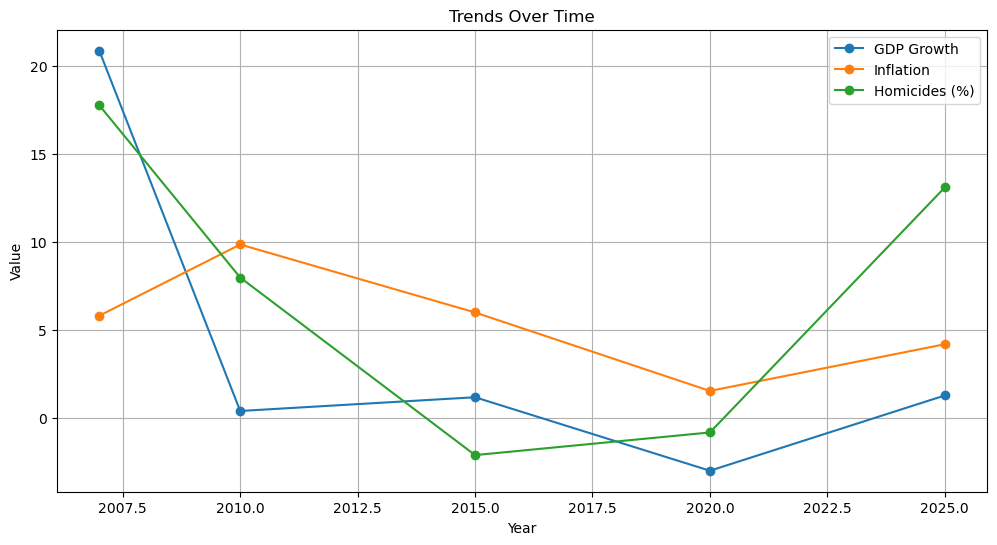

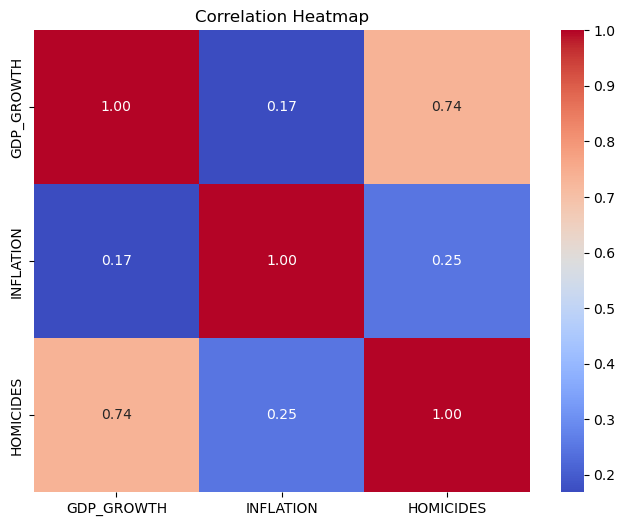

In [11]:
feature_data = pd.read_csv("csvs/collated-feature-data.csv")

# Inspect the data
print("Data Head:")
print(feature_data.head())
print("\nData Info:")
print(feature_data.info())
print("\nSummary Statistics:")
print(feature_data.describe())

# Convert percentages to numeric values
feature_data['HOMICIDES'] = feature_data['HOMICIDES'].str.rstrip('%').astype(float)

# Plot trends over time
plt.figure(figsize=(12, 6))
plt.plot(feature_data['YR'], feature_data['GDP_GROWTH'], label='GDP Growth', marker='o')
plt.plot(feature_data['YR'], feature_data['INFLATION'], label='Inflation', marker='o')
plt.plot(feature_data['YR'], feature_data['HOMICIDES'], label='Homicides (%)', marker='o')
plt.title('Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(feature_data.drop(columns=['YR']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots to compare features (if voting behavior data is available)
# Example: Replace 'VOTING_BEHAVIOR' with the actual column name for voting behavior
# sns.pairplot(data, x_vars=['GDP_GROWTH', 'INFLATION', 'HOMICIDES'], y_vars=['VOTING_BEHAVIOR'], height=4)
# plt.show()

C:\Users\maian\AppData\Local\Temp\ipykernel_26140\2622017002.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_2025['VOTING_BEHAVIOR'] = [avg_turnout_07, avg_turnout_10, avg_turnout_15, avg_turnout_20]
c:\Users\maian\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\maian\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\maian\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796

                            OLS Regression Results                            
Dep. Variable:        VOTING_BEHAVIOR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 30 Apr 2025   Prob (F-statistic):                nan
Time:                        02:12:58   Log-Likelihood:                 136.72
No. Observations:                   4   AIC:                            -265.4
Df Residuals:                       0   BIC:                            -267.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5630        inf          0        n

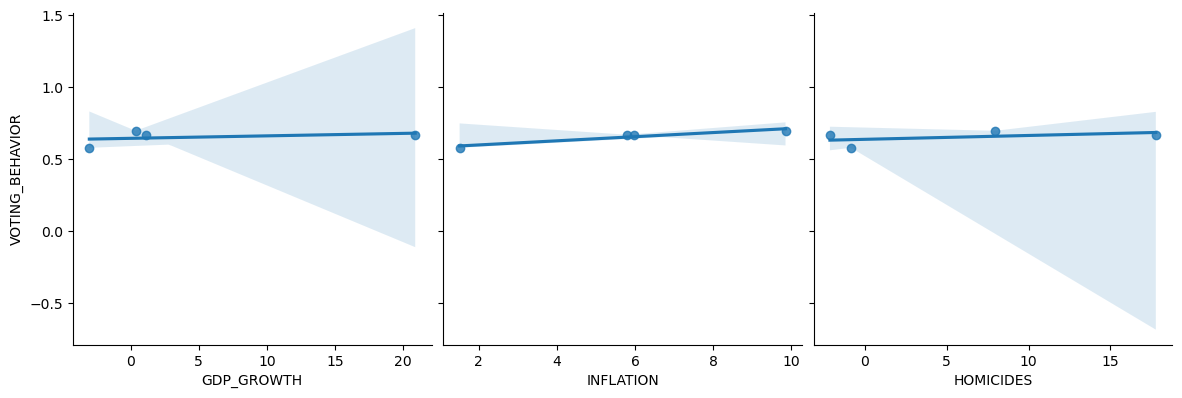

In [12]:
# Convert percentages to numeric values
feature_data['HOMICIDES'] = feature_data['HOMICIDES']

# Calculate average voter turnout for the years with data
avg_turnout_07 = sht_07['VOTER_TURNOUT'].mean()
avg_turnout_10 = sht_10['VOTER_TURNOUT'].mean()
avg_turnout_15 = sht_15['VOTER_TURNOUT'].mean()
avg_turnout_20 = sht_20['VOTER_TURNOUT'].mean()

# Exclude 2025 from the DataFrame before assigning VOTING_BEHAVIOR
data_without_2025 = feature_data[feature_data['YR'] != 2025]

# Add the voter turnout data to the DataFrame (for years with data)
data_without_2025['VOTING_BEHAVIOR'] = [avg_turnout_07, avg_turnout_10, avg_turnout_15, avg_turnout_20]

# Separate the data for 2025 (to predict later)
data_2025 = feature_data[feature_data['YR'] == 2025]

# Prepare the independent (X) and dependent (y) variables
X = data_without_2025[['GDP_GROWTH', 'INFLATION', 'HOMICIDES']]  # Independent variables
y = data_without_2025['VOTING_BEHAVIOR']  # Dependent variable

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Predict VOTING_BEHAVIOR for 2025
X_2025 = data_2025[['GDP_GROWTH', 'INFLATION', 'HOMICIDES']]
X_2025 = sm.add_constant(X_2025, has_constant='add')  # Ensure the constant column is added
print("X_2025 for prediction:", X_2025)  # Debugging: Check the shape of X_2025

# Make the prediction
predicted_turnout_2025 = model.predict(X_2025)

# Plot the relationships (optional)
sns.pairplot(data_without_2025, x_vars=['GDP_GROWTH', 'INFLATION', 'HOMICIDES'], y_vars='VOTING_BEHAVIOR', height=4, aspect=1, kind='reg')
plt.show()

In [13]:
# List of DataFrames and corresponding years
dataframes = [
    ('2007', sht_07),
    ('2010', sht_10),
    ('2015', sht_15),
    ('2020', sht_20)
]

# Initialize a list to store results for all years
all_results = []

# Iterate through each DataFrame
for year, df in dataframes:
    # Group by constituency
    grouped = df.groupby('ELECTORAL_DISTRICT')

    # Iterate through each constituency
    for constituency, group in grouped:
        # Calculate metrics
        total_votes = group['TOTAL_NUMBER_OF_VOTES_CAST'].sum()
        voter_turnout = group['VOTER_TURNOUT'].mean()  # Average voter turnout
        pnm_votes = group['P.N.M._VOTES'].sum()
        unc_votes = group['U.N.C._VOTES'].sum()
        cop_votes = group['C.O.P._VOTES'].sum()

        # Calculate percentages
        pnm_percentage = (pnm_votes / total_votes) * 100 if total_votes > 0 else 0
        unc_percentage = (unc_votes / total_votes) * 100 if total_votes > 0 else 0
        cop_percentage = (cop_votes / total_votes) * 100 if total_votes > 0 else 0

        # Append results
        all_results.append({
            'Year': year,
            'Constituency': constituency,
            'Total Votes': total_votes,
            'Voter Turnout (%)': voter_turnout * 100,  # Convert to percentage
            'PNM Votes (%)': pnm_percentage,
            'UNC Votes (%)': unc_percentage,
            'COP Votes (%)': cop_percentage
        })

# Create a DataFrame from the results
all_results_df = pd.DataFrame(all_results)

# all_results_df.to_csv('all_constituency_evaluation.csv', index=False)

# Display the results
all_results_df

,Year,Constituency,Total Votes,Voter Turnout (%),PNM Votes (%),UNC Votes (%),COP Votes (%)
0,2007,ARIMA,13464,58.936310,63.896316,9.090909,25.727867
1,2007,AROUCA/MALONEY,15948,67.367887,75.589416,9.280161,14.879609
2,2007,BARATARIA/SAN JUAN,16451,66.882140,43.638685,32.593763,23.202237
3,2007,CARONI CENTRAL,16640,72.940867,27.518029,45.763221,26.442308
4,2007,CARONI EAST,16460,69.881973,23.286756,50.625759,25.698663
...,...,...,...,...,...,...,...
163,2020,TOBAGO EAST,13112,56.756991,54.354790,44.737645,0.000000
164,2020,TOBAGO WEST,13883,50.144477,66.808327,32.420946,0.000000
165,2020,TOCO/SANGRE GRANDE,18237,58.647414,58.660964,40.099797,0.000000
166,2020,TOTAL,658297,58.043972,48.952069,48.542679,0.070941


In [14]:
# Ensure both columns have the same data type
data_without_2025['YR'] = data_without_2025['YR'].astype(str)  # Convert YR to string
all_results_df['Year'] = all_results_df['Year'].astype(str)    # Convert Year to string

# Merge national data with constituency-level data
merged_data = pd.merge(data_without_2025, all_results_df, left_on='YR', right_on='Year', how='left')

# Initialize a list to store regression results
regression_results = []

# Group by constituency
grouped = merged_data.groupby('Constituency')


# Iterate through each constituency
for constituency, group in grouped:
    # Prepare the independent (X) and dependent (y) variables
    X = group[['GDP_GROWTH', 'INFLATION', 'HOMICIDES']]  # Independent variables
    y = group['VOTING_BEHAVIOR']  # Dependent variable

    # Add a constant to the model (for the intercept)
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Store the results
    regression_results.append({
        'Constituency': constituency,
        'R-squared': model.rsquared,
        'Intercept': model.params['const'],
        'GDP_GROWTH Coef': model.params['GDP_GROWTH'],
        'INFLATION Coef': model.params['INFLATION'],
        'HOMICIDES Coef': model.params['HOMICIDES'],
        'P-value (GDP_GROWTH)': model.pvalues['GDP_GROWTH'],
        'P-value (INFLATION)': model.pvalues['INFLATION'],
        'P-value (HOMICIDES)': model.pvalues['HOMICIDES']
    })

# Create a DataFrame from the regression results
regression_results_df = pd.DataFrame(regression_results)

# regression_results_df.to_csv('constituency_regression_results.csv', index=False)

# Display the results
regression_results_df

C:\Users\maian\AppData\Local\Temp\ipykernel_26140\1358664716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_2025['YR'] = data_without_2025['YR'].astype(str)  # Convert YR to string


,Constituency,R-squared,Intercept,GDP_GROWTH Coef,INFLATION Coef,HOMICIDES Coef,P-value (GDP_GROWTH),P-value (INFLATION),P-value (HOMICIDES)
0,ARIMA,1.0,0.562983,0.003125,0.015853,-0.002777,NaN,NaN,NaN
1,AROUCA/MALONEY,1.0,0.562983,0.003125,0.015853,-0.002777,NaN,NaN,NaN
2,BARATARIA/SAN JUAN,1.0,0.562983,0.003125,0.015853,-0.002777,NaN,NaN,NaN
3,CARONI CENTRAL,1.0,0.562983,0.003125,0.015853,-0.002777,NaN,NaN,NaN
4,CARONI EAST,1.0,0.562983,0.003125,0.015853,-0.002777,NaN,NaN,NaN
5,CHAGUANAS EAST,1.0,0.562983,0.003125,0.015853,-0.002777,NaN,NaN,NaN
6,CHAGUANAS WEST,1.0,0.562983,0.003125,0.015853,-0.002777,NaN,NaN,NaN
7,COUVA NORTH,1.0,0.562983,0.003125,0.015853,-0.002777,NaN,NaN,NaN
8,COUVA SOUTH,1.0,0.562983,0.003125,0.015853,-0.002777,NaN,NaN,NaN
9,CUMUTO/MANZANILLA,1.0,0.562983,0.003125,0.015853,-0.002777,NaN,NaN,NaN
